In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GroupShuffleSplit 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve

import time

In [30]:
X_train = pd.read_csv("X_train_final.csv")
X_test = pd.read_csv("X_test_final.csv")

y_train = pd.read_csv("y_train_final.csv")
y_test = pd.read_csv("y_test_final.csv")

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109333 entries, 0 to 109332
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gene_id                      109333 non-null  object 
 1   transcript_id                109333 non-null  object 
 2   order_1                      109333 non-null  object 
 3   order_2                      109333 non-null  object 
 4   order_3                      109333 non-null  object 
 5   order_6                      109333 non-null  object 
 6   order_7                      109333 non-null  object 
 7   transcript_position          109333 non-null  float64
 8   dwelling_time_1_min          109333 non-null  float64
 9   dwelling_time_1_max          109333 non-null  float64
 10  dwelling_time_1_median       109333 non-null  float64
 11  dwelling_time_1_std          109333 non-null  float64
 12  sd_current_1_min             109333 non-null  float64
 13 

In [32]:
X_train[X_train.isna().any(axis=1)]

,gene_id,transcript_id,order_1,order_2,order_3,order_6,order_7,transcript_position,dwelling_time_1_min,dwelling_time_1_max,...,diff_mean_current_1_std,diff_mean_current_2_min,diff_mean_current_2_max,diff_mean_current_2_median,diff_mean_current_2_std,relative_position,count_A,count_C,count_G,count_T


In [33]:
y_train

,label
0,0
1,0
2,0
3,0
4,0
...,...
109328,1
109329,1
109330,1
109331,1


In [34]:
X_train.head()

,gene_id,transcript_id,order_1,order_2,order_3,order_6,order_7,transcript_position,dwelling_time_1_min,dwelling_time_1_max,...,diff_mean_current_1_std,diff_mean_current_2_min,diff_mean_current_2_max,diff_mean_current_2_median,diff_mean_current_2_std,relative_position,count_A,count_C,count_G,count_T
0,ENSG00000107937,ENST00000360803,A,G,A,A,G,0.098147,0.080194,0.163195,...,0.238059,0.881279,0.511628,0.883152,0.090725,0.577691,0.6,0.000000,0.50,0.00
1,ENSG00000177885,ENST00000316804,G,T,G,A,G,0.152080,0.121507,0.120615,...,0.271279,0.459665,0.289037,0.423913,0.182703,0.877069,0.2,0.000000,0.75,0.25
2,ENSG00000187514,ENST00000341369,C,T,G,A,A,0.017942,0.080194,0.168749,...,0.259596,0.368341,0.324474,0.362319,0.177830,0.214352,0.4,0.333333,0.25,0.25
3,ENSG00000113387,ENST00000265073,A,T,A,A,T,0.016500,0.080194,0.153939,...,0.151127,0.814307,0.513843,0.846014,0.117286,0.430412,0.6,0.000000,0.00,0.50
4,ENSG00000103591,ENST00000261880,G,G,A,C,A,0.034335,0.164034,0.193742,...,0.200493,0.753425,0.458472,0.768116,0.139148,0.212653,0.4,0.333333,0.50,0.00


In [35]:
# one-hot encoding for order{i} columns
features_nominal = ['order_1', 'order_2', 'order_3','order_6', 'order_7']
X_train = pd.get_dummies(X_train, columns=features_nominal)
X_test = pd.get_dummies(X_test, columns=features_nominal)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109333 entries, 0 to 109332
Data columns (total 84 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gene_id                      109333 non-null  object 
 1   transcript_id                109333 non-null  object 
 2   transcript_position          109333 non-null  float64
 3   dwelling_time_1_min          109333 non-null  float64
 4   dwelling_time_1_max          109333 non-null  float64
 5   dwelling_time_1_median       109333 non-null  float64
 6   dwelling_time_1_std          109333 non-null  float64
 7   sd_current_1_min             109333 non-null  float64
 8   sd_current_1_max             109333 non-null  float64
 9   sd_current_1_median          109333 non-null  float64
 10  sd_current_1_std             109333 non-null  float64
 11  mean_current_1_min           109333 non-null  float64
 12  mean_current_1_max           109333 non-null  float64
 13 

In [37]:
X_train.head()

,gene_id,transcript_id,transcript_position,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_median,dwelling_time_1_std,sd_current_1_min,sd_current_1_max,sd_current_1_median,...,order_2_T,order_3_A,order_3_G,order_6_A,order_6_C,order_6_T,order_7_A,order_7_C,order_7_G,order_7_T
0,ENSG00000107937,ENST00000360803,0.098147,0.080194,0.163195,0.447439,0.337003,0.075467,0.074394,0.713727,...,0,1,0,1,0,0,0,0,1,0
1,ENSG00000177885,ENST00000316804,0.152080,0.121507,0.120615,0.278302,0.175542,0.251475,0.067797,0.297509,...,1,0,1,1,0,0,0,0,1,0
2,ENSG00000187514,ENST00000341369,0.017942,0.080194,0.168749,0.245957,0.160077,0.191249,0.066782,0.212506,...,1,0,1,1,0,0,1,0,0,0
3,ENSG00000113387,ENST00000265073,0.016500,0.080194,0.153939,0.306604,0.195068,0.123648,0.014513,0.072789,...,1,1,0,1,0,0,0,0,0,1
4,ENSG00000103591,ENST00000261880,0.034335,0.164034,0.193742,0.310647,0.279441,0.359636,0.057647,0.577919,...,0,1,0,0,1,0,1,0,0,0


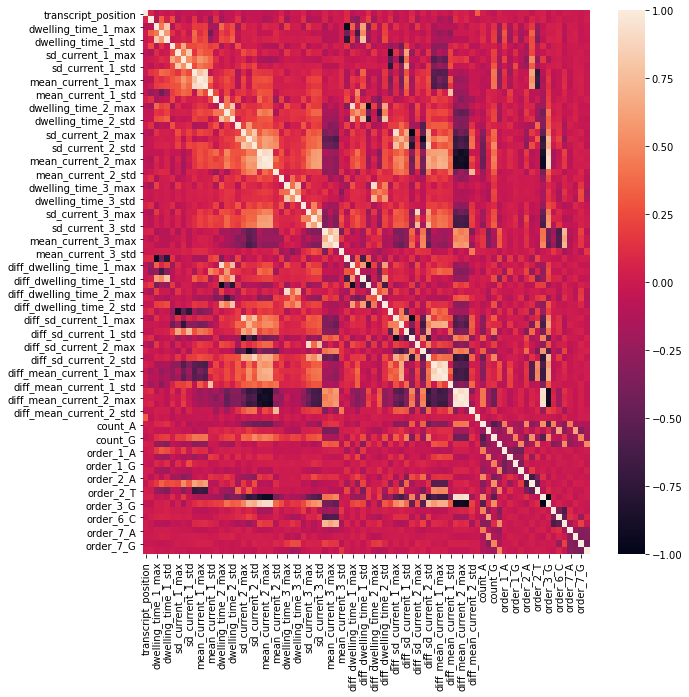

In [10]:
plt.figure(figsize=(10,10))
corrMatrix = X_train.corr()
sns.heatmap(corrMatrix)
plt.show()

In [11]:
# baseline model with default parameters
start = time.time()
forest1 = RandomForestClassifier(random_state = 1, n_jobs= -1)
forest1.fit(X_train,y_train.values.ravel())
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

Time taken: 0.18067695697148642 minutes


In [12]:
rf_y_pred = forest1.predict(X_test)

In [13]:
print(metrics.confusion_matrix(y_test, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

y_predict_prob = forest1.predict_proba(X_test)[:, 1]
print(metrics.confusion_matrix(y_test, rf_y_pred))
print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

[[22638    10]
 [ 1142    42]]
accuracy: 0.9516616314199395
precision: 0.8076923076923077
recall:    0.03547297297297297
roc auc:   0.5175157164405663
pr auc:    0.07657001208738369
[[22638    10]
 [ 1142    42]]
roc auc:   0.8853000600554193
pr auc:    0.43620064523413266


In [14]:
importance = forest1.feature_importances_
importance

array([0.01395653, 0.00374602, 0.00758862, 0.00805715, 0.00827251,
       0.01407375, 0.00898533, 0.01394559, 0.00919603, 0.02220908,
       0.02149772, 0.03235918, 0.01456666, 0.00420299, 0.00685159,
       0.00980081, 0.00801862, 0.0248702 , 0.01305456, 0.03686503,
       0.01881155, 0.01761501, 0.01210491, 0.03329846, 0.03218852,
       0.00409558, 0.00723165, 0.00844575, 0.0081595 , 0.01010617,
       0.00761643, 0.01097902, 0.00881484, 0.02060769, 0.01241749,
       0.02020304, 0.02846753, 0.00765949, 0.00771847, 0.00943806,
       0.00824396, 0.007577  , 0.00759859, 0.00958686, 0.00794978,
       0.01034081, 0.01036823, 0.02325254, 0.01429974, 0.01217155,
       0.00841054, 0.0207334 , 0.01721824, 0.01267332, 0.01011022,
       0.02112571, 0.01176339, 0.01730397, 0.01552962, 0.03060771,
       0.01483362, 0.01446606, 0.01086497, 0.00183488, 0.01795844,
       0.00599975, 0.00100652, 0.00056192, 0.0009099 , 0.00103512,
       0.00368559, 0.02256013, 0.00352559, 0.00426911, 0.00147

In [15]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, forest1.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame(feats.items(), columns=['Feature', 'Importance'])
#.rename(columns={0: 'importance'})
importances = importances.sort_values(by = ['Importance'], ascending = False)
importances

,Feature,Importance
19,sd_current_2_median,0.036865
23,mean_current_2_median,0.033298
11,mean_current_1_median,0.032359
24,mean_current_2_std,0.032189
77,order_6_T,0.031320
...,...,...
79,order_7_C,0.001145
69,order_1_T,0.001035
66,order_1_A,0.001007
68,order_1_G,0.000910


In [16]:
importances.Feature.iloc[0: 40].tolist()

['sd_current_2_median',
 'mean_current_2_median',
 'mean_current_1_median',
 'mean_current_2_std',
 'order_6_T',
 'diff_mean_current_2_median',
 'mean_current_3_std',
 'sd_current_2_min',
 'diff_sd_current_1_median',
 'order_2_G',
 'mean_current_1_min',
 'mean_current_1_max',
 'diff_mean_current_1_median',
 'diff_sd_current_2_median',
 'mean_current_3_min',
 'mean_current_3_median',
 'sd_current_2_std',
 'count_G',
 'mean_current_2_min',
 'diff_mean_current_2_min',
 'diff_sd_current_2_std',
 'diff_mean_current_2_max',
 'diff_mean_current_2_std',
 'mean_current_1_std',
 'relative_position',
 'diff_sd_current_1_std',
 'sd_current_1_min',
 'transcript_position',
 'sd_current_1_median',
 'sd_current_2_max',
 'diff_mean_current_1_min',
 'mean_current_3_max',
 'diff_sd_current_2_min',
 'mean_current_2_max',
 'diff_mean_current_1_std',
 'sd_current_3_median',
 'count_A',
 'diff_sd_current_1_max',
 'diff_sd_current_1_min',
 'diff_mean_current_1_max']

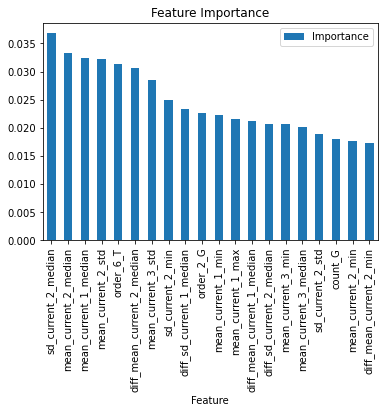

In [17]:
# scatter plot
importances.iloc[0:20].plot(kind = 'bar',
        x = 'Feature',
        y = 'Importance')
  
# set the title
plt.title('Feature Importance')
  
# show the plot
plt.show()

In [18]:
importances.Feature.iloc[0:30].tolist()

['sd_current_2_median',
 'mean_current_2_median',
 'mean_current_1_median',
 'mean_current_2_std',
 'order_6_T',
 'diff_mean_current_2_median',
 'mean_current_3_std',
 'sd_current_2_min',
 'diff_sd_current_1_median',
 'order_2_G',
 'mean_current_1_min',
 'mean_current_1_max',
 'diff_mean_current_1_median',
 'diff_sd_current_2_median',
 'mean_current_3_min',
 'mean_current_3_median',
 'sd_current_2_std',
 'count_G',
 'mean_current_2_min',
 'diff_mean_current_2_min',
 'diff_sd_current_2_std',
 'diff_mean_current_2_max',
 'diff_mean_current_2_std',
 'mean_current_1_std',
 'relative_position',
 'diff_sd_current_1_std',
 'sd_current_1_min',
 'transcript_position',
 'sd_current_1_median',
 'sd_current_2_max']

In [19]:
temp = X_train[importances.Feature.iloc[0:20].tolist()]
temp_test = X_test[importances.Feature.iloc[0:20].tolist()]

In [20]:
# baseline model with default parameters
start = time.time()
forest2 = RandomForestClassifier(random_state = 1, n_jobs= -1)
forest2.fit(temp,y_train.values.ravel())
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

Time taken: 0.07656393051147461 minutes


In [21]:
rf_y_pred = forest2.predict(temp_test)

In [22]:
print(metrics.confusion_matrix(y_test, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

y_predict_prob = forest2.predict_proba(temp_test)[:, 1]
print(metrics.confusion_matrix(y_test, rf_y_pred))
print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

[[22602    46]
 [ 1037   147]]
accuracy: 0.9545568982880162
precision: 0.7616580310880829
recall:    0.1241554054054054
roc auc:   0.56106216049147
pr auc:    0.13807688542995666
[[22602    46]
 [ 1037   147]]
recall:    0.1241554054054054
roc auc:   0.88296487608237
pr auc:    0.45519787488460506


In [23]:
sel = ['diff_mean_current_1_median', 'sd_current_2_median', 'mean_current_1_median', 'diff_mean_current_2_max', 'mean_current_3_median', 'mean_current_1_max', 'sd_current_2_std', 'order_6_T', 'mean_current_3_std', 'diff_sd_current_2_std', 'mean_current_3_min', 'sd_current_2_min', 'mean_current_2_std', 'mean_current_2_median', 'mean_current_1_std', 'sd_current_3_median', 'count_G', 'mean_current_1_min', 'diff_sd_current_1_std', 'diff_mean_current_2_std', 'sd_current_1_median', 'mean_current_3_max', 'mean_current_2_min', 'relative_position', 'mean_current_2_max', 'diff_mean_current_1_min', 'diff_sd_current_1_median', 'diff_sd_current_2_median', 'sd_current_2_max', 'dwelling_time_3_max', 'order_2_G', 'sd_current_3_max', 'sd_current_3_std', 'diff_mean_current_2_median']

In [24]:
X_train = X_train[sel]
X_test = X_test[sel]

In [25]:
# after selecting features, compared with features selected by other methods
# baseline model with default parameters
start = time.time()
forest1 = RandomForestClassifier(random_state = 1, n_jobs= -1)
forest1.fit(X_train,y_train.values.ravel())
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

Time taken: 0.1073503573735555 minutes


In [26]:
rf_y_pred = forest1.predict(X_test)
print(metrics.confusion_matrix(y_test, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

y_predict_prob = forest1.predict_proba(X_test)[:, 1]
print(metrics.confusion_matrix(y_test, rf_y_pred))
print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

[[22632    16]
 [ 1130    54]]
accuracy: 0.951913393756294
precision: 0.7714285714285715
recall:    0.04560810810810811
roc auc:   0.5224508219805818
pr auc:    0.08259863769682502
[[22632    16]
 [ 1130    54]]
roc auc:   0.8841565868234891
pr auc:    0.4502290884340061


In [89]:
# after selecting features, compared with features selected by other methods
# baseline model with default parameters
#start = time.time()
#forest2 = RandomForestClassifier( n_estimators=211, 
#                                  bootstrap = True,
#                                  max_features = 'sqrt',
#                                  max_depth=19,
#                                  criterion='gini', random_state = 1, n_jobs= -1)
#forest2.fit(X_train,y_train.values.ravel())
#end = time.time()
#print("Time taken:", (end-start)/60, "minutes")

Time taken: 0.22697754303614298 minutes


In [90]:
# rf_y_pred = forest2.predict(X_test)
# print(metrics.confusion_matrix(y_test, rf_y_pred))
# # TN FP
# # FN TP

# print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
# print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
# print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
# print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
# print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

# y_predict_prob = forest1.predict_proba(X_test)[:, 1]
# print(metrics.confusion_matrix(y_test, rf_y_pred))
# print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
# print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

[[22380   268]
 [ 1169    15]]
accuracy: 0.9397029204431017
precision: 0.053003533568904596
recall:    0.01266891891891892
roc auc:   0.5004178222287988
pr auc:    0.049723192668932104
[[22380   268]
 [ 1169    15]]
roc auc:   0.49271072873805455
pr auc:    0.048371432590077826


In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

clf = RandomForestClassifier(random_state = 4262, n_jobs=-1) #Initialize with whatever parameters you want to

# 10-Fold Cross validation
#np.mean(cross_val_score(clf, X_train, y_train, cv=10))

In [28]:
# param_grid = {
#                  'n_estimators': [100, 150, 200, 250],
#                  'max_depth': [15, 20, 25, 30]
#              }

# from sklearn.model_selection import GridSearchCV

# grid_clf = GridSearchCV(clf, param_grid, cv=10)
# grid_clf.fit(X_train, y_train.values.ravel())

KeyboardInterrupt: 

In [115]:
# grid_clf. best_params_

{'max_depth': 30, 'n_estimators': 200}

In [116]:
# grid_clf. best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=200, n_jobs=-1,
                       random_state=4262)

In [112]:
# grid_clf.cv_results_

{'mean_fit_time': array([15.68111072, 24.7005445 , 33.94337533, 40.50324547]),
 'std_fit_time': array([2.72600166, 0.96267866, 4.46540175, 0.58097469]),
 'mean_score_time': array([0.19105287, 0.27825651, 0.36428626, 0.41794844]),
 'std_score_time': array([0.01159311, 0.01807571, 0.01952206, 0.04280057]),
 'param_n_estimators': masked_array(data=[100, 150, 200, 250],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 150},
  {'n_estimators': 200},
  {'n_estimators': 250}],
 'split0_test_score': array([0.99295775, 0.99277483, 0.99277483, 0.99295775]),
 'split1_test_score': array([0.99250046, 0.99250046, 0.99250046, 0.99259192]),
 'split2_test_score': array([0.99396378, 0.99332358, 0.99323212, 0.99314066]),
 'split3_test_score': array([0.9932315 , 0.99304857, 0.9929571 , 0.9929571 ]),
 'split4_test_score': array([0.99359737, 0.9940547 , 0.99423763, 0.99451203]),
 'split5_test_score': ar

In [117]:
# # choose max depth = 30, n_estimators = 200
# start = time.time()
# forest_cv = RandomForestClassifier(n_estimators=200, 
#                                    max_depth=30,
#                                    random_state = 4264, n_jobs= -1)
# forest_cv.fit(X_train,y_train.values.ravel())
# end = time.time()
# print("Time taken:", (end-start)/60, "minutes")

Time taken: 0.2141056974728902 minutes


In [118]:
# rf_y_pred = forest_cv.predict(X_test)
# print(metrics.confusion_matrix(y_test, rf_y_pred))
# # TN FP
# # FN TP

# print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
# print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
# print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
# print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
# print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

# y_predict_prob = forest1.predict_proba(X_test)[:, 1]
# print(metrics.confusion_matrix(y_test, rf_y_pred))
# print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
# print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

[[22569    79]
 [ 1182     2]]
accuracy: 0.9470879489761665
precision: 0.024691358024691357
recall:    0.0016891891891891893
roc auc:   0.4991005112318253
pr auc:    0.049638888636874545
[[22569    79]
 [ 1182     2]]
roc auc:   0.49271072873805455
pr auc:    0.048371432590077826


## After intermediate leaderboard submissions
### new selected features
### implement CV 
- split by gene id for folds using GroupShuffleSplit
- for each fold, do hyperparameter tuning (?) maybe idk


In [35]:
X_train = pd.read_csv("X_train_final_geneid.csv")
X_test = pd.read_csv("X_test_final_geneid.csv")

y_train = pd.read_csv("y_train_final_geneid.csv")
y_test = pd.read_csv("y_test_final_geneid.csv")

In [36]:
X_train.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109333 entries, 0 to 109332
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gene_id                      109333 non-null  object 
 1   transcript_id                109333 non-null  object 
 2   order_1                      109333 non-null  object 
 3   order_2                      109333 non-null  object 
 4   order_3                      109333 non-null  object 
 5   order_6                      109333 non-null  object 
 6   order_7                      109333 non-null  object 
 7   transcript_position          109333 non-null  float64
 8   dwelling_time_1_min          109333 non-null  float64
 9   dwelling_time_1_max          109333 non-null  float64
 10  dwelling_time_1_median       109333 non-null  float64
 11  dwelling_time_1_std          109333 non-null  float64
 12  sd_current_1_min             109333 non-null  float64
 13 

In [37]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109333 entries, 0 to 109332
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   label   109333 non-null  int64
dtypes: int64(1)
memory usage: 854.3 KB


In [38]:
# one-hot encoding for order{i} columns
features_nominal = ['order_1', 'order_2', 'order_3','order_6', 'order_7']
X_train = pd.get_dummies(X_train, columns=features_nominal)
X_test = pd.get_dummies(X_test, columns=features_nominal)

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109333 entries, 0 to 109332
Data columns (total 84 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gene_id                      109333 non-null  object 
 1   transcript_id                109333 non-null  object 
 2   transcript_position          109333 non-null  float64
 3   dwelling_time_1_min          109333 non-null  float64
 4   dwelling_time_1_max          109333 non-null  float64
 5   dwelling_time_1_median       109333 non-null  float64
 6   dwelling_time_1_std          109333 non-null  float64
 7   sd_current_1_min             109333 non-null  float64
 8   sd_current_1_max             109333 non-null  float64
 9   sd_current_1_median          109333 non-null  float64
 10  sd_current_1_std             109333 non-null  float64
 11  mean_current_1_min           109333 non-null  float64
 12  mean_current_1_max           109333 non-null  float64
 13 

In [40]:
# further split X_train into k-folds for cv
from sklearn.model_selection import GroupShuffleSplit

k = 5 # number of folds
gss = GroupShuffleSplit(n_splits=k, random_state = 42)
folds = gss.split(X=X_train, groups=X_train['gene_id'])

In [41]:
train_lst = []
test_lst = []
for train, test in folds:
    train_lst.append(train)
    test_lst.append(test)
    print(train, "\n", test, "\n")

[     0      2      3 ... 109330 109331 109332] 
 [     1      5     11 ... 109324 109327 109329] 

[     0      1      2 ... 109328 109331 109332] 
 [    13     15     25 ... 109325 109329 109330] 

[     0      1      4 ... 109330 109331 109332] 
 [     2      3      8 ... 109321 109325 109327] 

[     0      1      2 ... 109330 109331 109332] 
 [    11     24     25 ... 109315 109320 109326] 

[     0      1      2 ... 109327 109331 109332] 
 [    13     20     26 ... 109328 109329 109330] 



In [42]:
# confirm there are no overlapping gene_id 
temp = x_train.iloc[train_lst[0]]['gene_id'].unique().tolist()
temp_2 = x_train.iloc[test_lst[0]]['gene_id'].unique().tolist()
print(list(set(temp) & set(temp_2)))

[]


In [43]:
# select features 
# method 1
# selected_features = ['diff_mean_current_1_median', 'sd_current_2_median', 'mean_current_1_median', 
#             'diff_mean_current_2_max', 'mean_current_3_median', 'mean_current_1_max', 'sd_current_2_std', 
#             'order_6_T', 'mean_current_3_std', 'diff_sd_current_2_std', 'mean_current_3_min', 'sd_current_2_min', 
#             'mean_current_2_std', 'mean_current_2_median', 'mean_current_1_std', 'sd_current_3_median', 
#             'count_G', 'mean_current_1_min', 'diff_sd_current_1_std', 'diff_mean_current_2_std', 
#             'sd_current_1_median', 'mean_current_3_max', 'mean_current_2_min', 'relative_position', 
#             'mean_current_2_max', 'diff_mean_current_1_min', 'diff_sd_current_1_median', 'diff_sd_current_2_median', 
#             'sd_current_2_max', 'dwelling_time_3_max', 'order_2_G', 'sd_current_3_max', 'sd_current_3_std', 
#             'diff_mean_current_2_median']
# method 2
selected_features = ['mean_current_1_median', 'mean_current_3_median', 'sd_current_2_std', 'order_6_T', 'mean_current_3_std', 'diff_sd_current_2_std', 'mean_current_3_min', 'sd_current_2_min', 'mean_current_2_std', 'mean_current_1_std', 'sd_current_3_median', 'count_G', 'mean_current_1_min', 'diff_sd_current_1_std', 'diff_mean_current_2_std', 'sd_current_1_median', 'mean_current_3_max', 'relative_position', 'mean_current_2_max', 'diff_mean_current_1_min', 'diff_sd_current_1_median', 'diff_sd_current_2_median', 'sd_current_2_max', 'dwelling_time_3_max', 'order_2_G', 'sd_current_3_max', 'sd_current_3_std']

In [44]:
x_train = X_train[selected_features]
x_test = X_test[selected_features]

In [45]:
start = time.time()

accuracy = []
precision = []
recall = []
roc_auc = []
pr_auc = []
    
for i in range(k):
    print("Fold number:", i+1)

    cv_x_train = x_train.iloc[train_lst[i]]
    cv_x_test = x_train.iloc[test_lst[i]]

    cv_y_train = y_train.iloc[train_lst[i]]
    cv_y_test = y_train.iloc[test_lst[i]]

    # fit model
    #clf = RandomForestClassifier(random_state = 4262, n_jobs=-1)
    forest_cv = RandomForestClassifier(random_state = 42, n_jobs= -1)
    forest_cv.fit(cv_x_train, cv_y_train.values.ravel())

    # test metrics
    rf_y_pred = forest_cv.predict(cv_x_test)
    print(metrics.confusion_matrix(cv_y_test, rf_y_pred))
    # TN FP
    # FN TP
    a = metrics.accuracy_score(cv_y_test, rf_y_pred)
    p = metrics.precision_score(cv_y_test,rf_y_pred)
    r = metrics.recall_score(cv_y_test, rf_y_pred)

    y_predict_prob = forest_cv.predict_proba(cv_x_test)[:, 1]
    ra = metrics.roc_auc_score(cv_y_test, y_predict_prob)
    pa = metrics.average_precision_score(cv_y_test, y_predict_prob)

    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    roc_auc.append(ra)
    pr_auc.append(pa)

    print(f'accuracy: {a}')
    print(f'precision: {p}')
    print(f'recall:    {r}')
    print(f'roc auc:   {ra}')
    print(f'pr auc:    {pa}')

    print('\n\n')
    
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

Fold number: 1
[[12728   129]
 [ 7447  2511]]
accuracy: 0.6679377602454526
precision: 0.9511363636363637
recall:    0.25215906808596106
roc auc:   0.8940846101342838
pr auc:    0.8669595182385897



Fold number: 2
[[12680   134]
 [ 7025  2371]]
accuracy: 0.6776677172444845
precision: 0.9465069860279441
recall:    0.25234142188165176
roc auc:   0.8929905258410225
pr auc:    0.8585340222268915



Fold number: 3
[[12255   125]
 [ 6966  2634]]
accuracy: 0.6773885350318471
precision: 0.9546937296121784
recall:    0.274375
roc auc:   0.9013313896742057
pr auc:    0.8780941149547369



Fold number: 4
[[12507   136]
 [ 6811  2612]]
accuracy: 0.685171757454908
precision: 0.950509461426492
recall:    0.27719409954366975
roc auc:   0.9066125611511158
pr auc:    0.8739231019120038



Fold number: 5
[[12656   134]
 [ 7481  2446]]
accuracy: 0.6647884843949465
precision: 0.9480620155038759
recall:    0.24639871058728718
roc auc:   0.9035186060745396
pr auc:    0.8713563558327064



Time taken: 0.5937

In [46]:
print('accuracy:', sum(accuracy)/5)
print('precision:', sum(precision)/5)
print('recall:', sum(recall)/5)
print('roc auc:', sum(roc_auc)/5)
print('pr auc:', sum(pr_auc)/5)

accuracy: 0.6745908508743278
precision: 0.9501817112413707
recall: 0.26049366001971397
roc auc: 0.8997075385750335
pr auc: 0.8697734226329856


In [47]:
#clf = RandomForestClassifier(random_state = 4262, n_jobs=-1)
forest_cv = RandomForestClassifier(random_state = 42, n_jobs= -1)
forest_cv.fit(x_train, y_train.values.ravel())

# test metrics
rf_y_pred = forest_cv.predict(x_test)
print(metrics.confusion_matrix(y_test, rf_y_pred))
# TN FP
# FN TP
a = metrics.accuracy_score(y_test, rf_y_pred)
p = metrics.precision_score(y_test,rf_y_pred)
r = metrics.recall_score(y_test, rf_y_pred)
y_predict_prob = forest_cv.predict_proba(x_test)[:, 1]
ra = metrics.roc_auc_score(y_test, y_predict_prob)
pa = metrics.average_precision_score(y_test, y_predict_prob)

print(f'accuracy: {a}')
print(f'precision: {p}')
print(f'recall:    {r}')
print(f'roc auc:   {ra}')
print(f'pr auc:    {pa}')

[[22641     7]
 [ 1163    21]]
accuracy: 0.9509063444108762
precision: 0.75
recall:    0.017736486486486486
roc auc:   0.877690206073921
pr auc:    0.386084817732799


In [48]:
import itertools

In [49]:
def manual_fold(k, features_lst, x_df, y_df, min_depth, max_depth, step_depth, min_trees, max_trees, step_trees):
    # use GroupShuffleSplit to group by gene_id and split into k folds
    gss = GroupShuffleSplit(n_splits=k, random_state = 42)
    folds = gss.split(X=x_df, groups=x_df['gene_id'])
    
    # get row indice of folds
    train_lst = []
    test_lst = []
    for train, test in folds:
        train_lst.append(train)
        test_lst.append(test)
    
    # select relevant features for model
    x_df = x_df[features_lst]
    
    # grid for hyperparameter tuning
    max_d = np.arange(min_depth, max_depth+1, step_depth).tolist()
    n_trees = np.arange(min_trees, max_trees+1, step_trees).tolist()
    a = [max_d, n_trees]
    space = list(itertools.product(*a))
    
    # hyperparameter tuning using cross validation
    # store parameters and result metrics into lists
    d = []
    t =[]
    accuracy = []
    precision = []
    recall = []
    roc_auc = []
    pr_auc = []
    
    for param in space:
        # fit model
        depth = param[0]
        trees = param[1]
        forest_cv = RandomForestClassifier(random_state = 42, n_jobs= -1, max_depth = depth, n_estimators = trees)
        
        acc = []
        pre = []
        rec = []
        rocauc = []
        prauc = []
        
        for i in range(k):
            print("Fold number:", i+1)

            cv_x_train = x_df.iloc[train_lst[i]]
            cv_x_test = x_df.iloc[test_lst[i]]

            cv_y_train = y_df.iloc[train_lst[i]]
            cv_y_test = y_df.iloc[test_lst[i]]

            forest_cv.fit(cv_x_train, cv_y_train.values.ravel())

            # test metrics
            rf_y_pred = forest_cv.predict(cv_x_test)

            a = metrics.accuracy_score(cv_y_test, rf_y_pred)
            p = metrics.precision_score(cv_y_test,rf_y_pred)
            r = metrics.recall_score(cv_y_test, rf_y_pred)

            y_predict_prob = forest_cv.predict_proba(cv_x_test)[:, 1]
            ra = metrics.roc_auc_score(cv_y_test, y_predict_prob)
            pa = metrics.average_precision_score(cv_y_test, y_predict_prob)

            acc.append(a)
            pre.append(p)
            rec.append(r)
            rocauc.append(ra)
            prauc.append(pa)
        
        print('average score for depth:', depth, "n_trees:", trees)
        print('accuracy:', sum(acc)/k)
        print('precision:', sum(pre)/k)
        print('recall:', sum(rec)/k)
        print('roc auc:', sum(rocauc)/k)
        print('pr auc:', sum(prauc)/k)
        print('\n\n')
        
        d.append(depth)
        t.append(trees)
        accuracy.append(sum(acc)/k)
        precision.append(sum(pre)/k)
        recall.append(sum(rec)/k)
        roc_auc.append(sum(rocauc)/k)
        pr_auc.append(sum(prauc)/k)
        
    # make dataframe containing all combinations of parameters and their results
    dictionary = {"depth":d, "trees":t, "accuracy":accuracy, "precision":precision, "recall":recall, "roc-auc":roc_auc, "pr-auc":pr_auc}
    result = pd.DataFrame(dictionary)
    return result

In [50]:
start = time.time()
res_df = manual_fold(5, selected_features, X_train, y_train, 5, 50, 5, 30, 80, 10) #max depth seems to be limiting -- range 20 to 50, step 5
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 5 n_trees: 30
accuracy: 0.7817441812560169
precision: 0.7506309144964645
recall: 0.740559319268763
roc auc: 0.8581615199281437
pr auc: 0.8114537468300409



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 5 n_trees: 40
accuracy: 0.7813485063225747
precision: 0.7518743774883578
recall: 0.7367977075646244
roc auc: 0.8592863370132534
pr auc: 0.8122070436180477



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 5 n_trees: 50
accuracy: 0.7811432951544148
precision: 0.7524902604568486
recall: 0.7349072374859895
roc auc: 0.859557709107249
pr auc: 0.8131964508483464



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 5 n_trees: 60
accuracy: 0.7809450932522601
precision: 0.7535582637756856
recall: 0.7321668279487771
roc auc: 0.859950614677032
p

Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 30 n_trees: 50
accuracy: 0.6799040184594807
precision: 0.9444603209785898
recall: 0.2752543640109778
roc auc: 0.8941369955029668
pr auc: 0.862081989821206



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 30 n_trees: 60
accuracy: 0.67992189867354
precision: 0.9450894377205961
recall: 0.27514860380225276
roc auc: 0.8958430164672959
pr auc: 0.8647029904473131



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 30 n_trees: 70
accuracy: 0.6798263455202419
precision: 0.9452474466124909
recall: 0.2747945528374458
roc auc: 0.8974159855046897
pr auc: 0.8668258186636549



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 30 n_trees: 80
accuracy: 0.6794128132353946
precision: 0.9465461104031153
recall: 0.27347098880494247
roc auc: 0.8989835675493966
pr auc: 0.

In [71]:
res_df.head(30)

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc
0,5,30,0.781744,0.750631,0.740559,0.858162,0.811454
1,5,40,0.781349,0.751874,0.736798,0.859286,0.812207
2,5,50,0.781143,0.752490,0.734907,0.859558,0.813196
3,5,60,0.780945,0.753558,0.732167,0.859951,0.813714
4,5,70,0.780982,0.753027,0.733357,0.860119,0.814070
5,5,80,0.780939,0.752739,0.733710,0.860425,0.814517
6,10,30,0.806223,0.838158,0.683222,0.891571,0.855966
7,10,40,0.808230,0.840914,0.685699,0.892466,0.857105
8,10,50,0.808020,0.842692,0.682932,0.893190,0.858078
9,10,60,0.807532,0.841836,0.682473,0.893606,0.858316


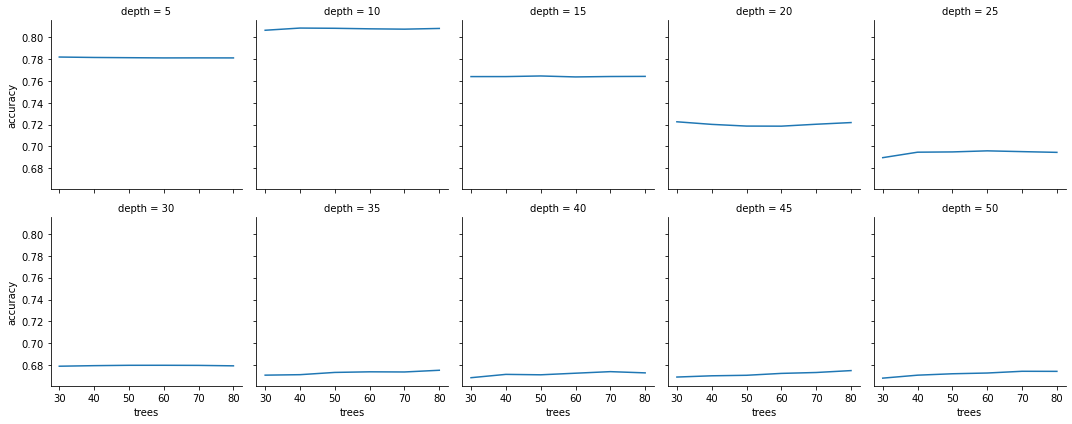

In [72]:
g = sns.FacetGrid(res_df, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "accuracy")

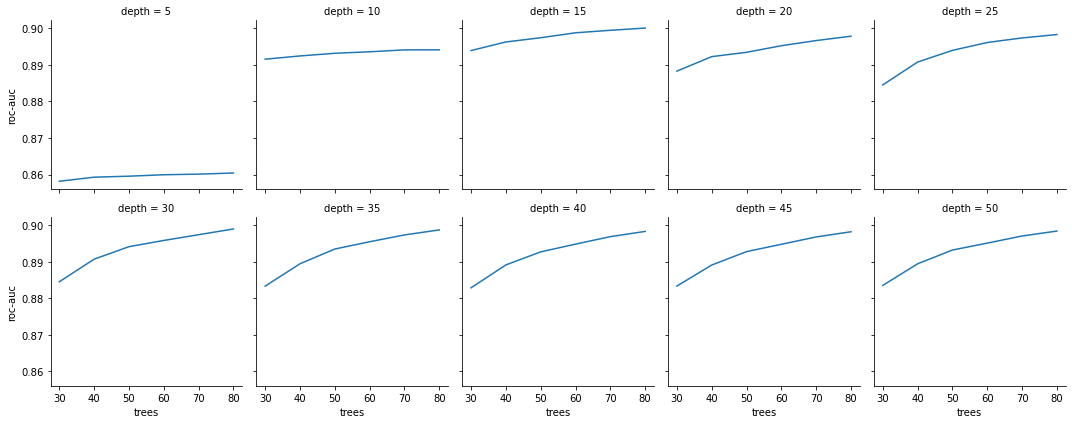

In [73]:
g = sns.FacetGrid(res_df, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "roc-auc")

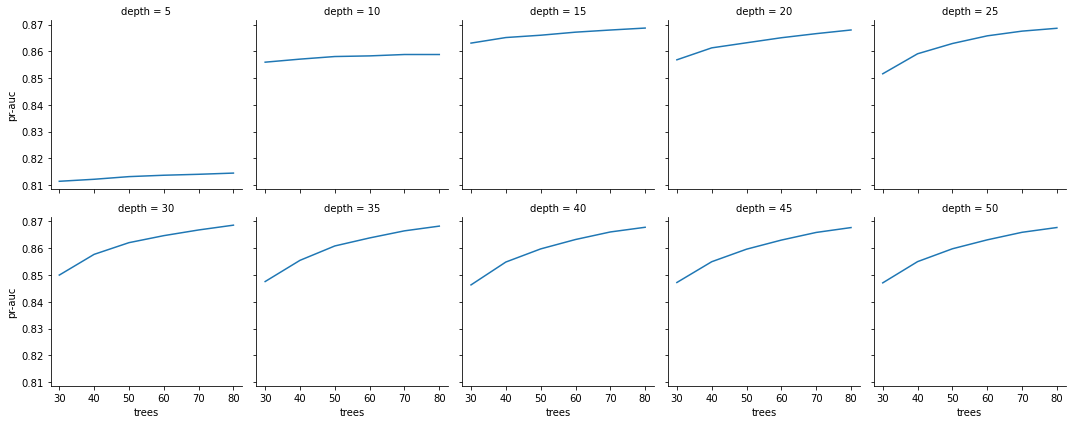

In [74]:
g = sns.FacetGrid(res_df, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "pr-auc")

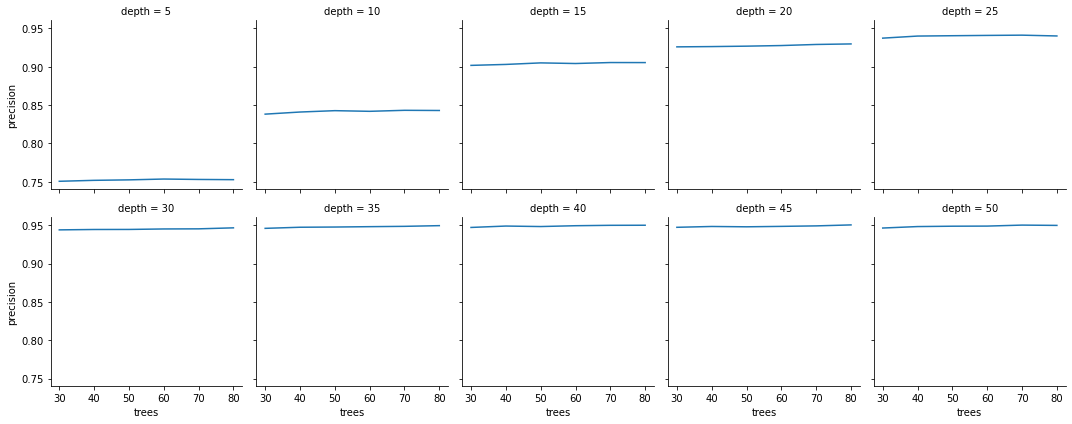

In [75]:
g = sns.FacetGrid(res_df, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "precision")

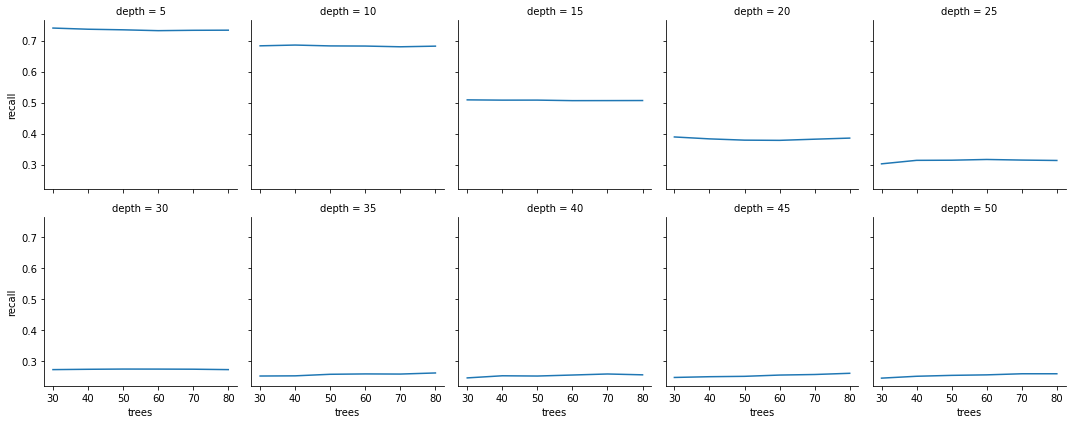

In [76]:
g = sns.FacetGrid(res_df, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "recall")

In [77]:
res_df['score'] = (res_df['roc-auc'] + res_df['pr-auc'])/2
res_df.head(10)

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc,score
0,5,30,0.781744,0.750631,0.740559,0.858162,0.811454,0.834808
1,5,40,0.781349,0.751874,0.736798,0.859286,0.812207,0.835747
2,5,50,0.781143,0.752490,0.734907,0.859558,0.813196,0.836377
3,5,60,0.780945,0.753558,0.732167,0.859951,0.813714,0.836832
4,5,70,0.780982,0.753027,0.733357,0.860119,0.814070,0.837095
5,5,80,0.780939,0.752739,0.733710,0.860425,0.814517,0.837471
6,10,30,0.806223,0.838158,0.683222,0.891571,0.855966,0.873768
7,10,40,0.808230,0.840914,0.685699,0.892466,0.857105,0.874786
8,10,50,0.808020,0.842692,0.682932,0.893190,0.858078,0.875634
9,10,60,0.807532,0.841836,0.682473,0.893606,0.858316,0.875961


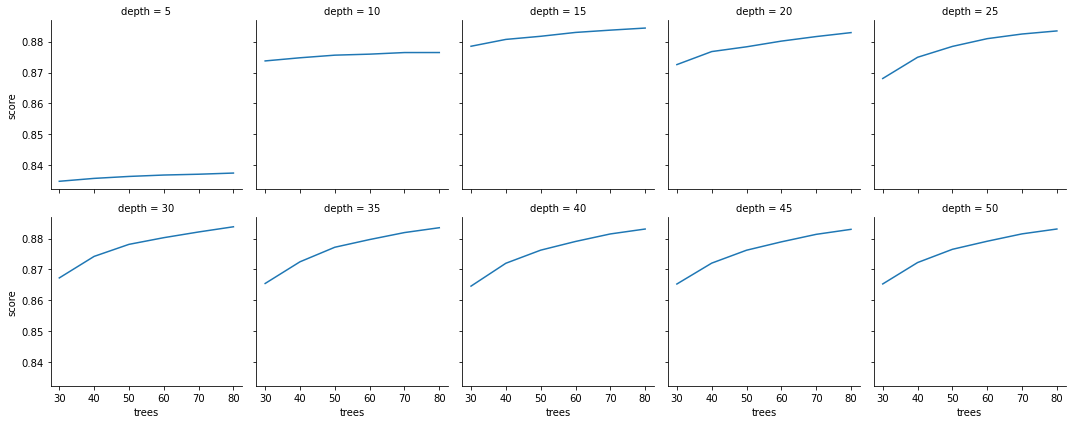

In [78]:
g = sns.FacetGrid(res_df, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "score")

In [79]:
# refine tuning
start = time.time()
res_df2 = manual_fold(5, selected_features, X_train, y_train, 5, 15, 1, 30, 80, 10)
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 5 n_trees: 30
accuracy: 0.7817441812560169
precision: 0.7506309144964645
recall: 0.740559319268763
roc auc: 0.8581615199281437
pr auc: 0.8114537468300409



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 5 n_trees: 40
accuracy: 0.7813485063225747
precision: 0.7518743774883578
recall: 0.7367977075646244
roc auc: 0.8592863370132534
pr auc: 0.8122070436180477



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 5 n_trees: 50
accuracy: 0.7811432951544148
precision: 0.7524902604568486
recall: 0.7349072374859895
roc auc: 0.859557709107249
pr auc: 0.8131964508483464



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 5 n_trees: 60
accuracy: 0.7809450932522601
precision: 0.7535582637756856
recall: 0.7321668279487771
roc auc: 0.859950614677032
p

Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 10 n_trees: 50
accuracy: 0.8080201203807322
precision: 0.8426920898860694
recall: 0.6829317712037017
roc auc: 0.8931896564534785
pr auc: 0.85807771022481



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 10 n_trees: 60
accuracy: 0.8075315150319831
precision: 0.8418360327961143
recall: 0.6824727793960608
roc auc: 0.8936057098056033
pr auc: 0.8583163524197396



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 10 n_trees: 70
accuracy: 0.8072249495766188
precision: 0.8431495525022598
recall: 0.6801091171569478
roc auc: 0.8941212568044918
pr auc: 0.8588331370194086



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 10 n_trees: 80
accuracy: 0.8078762451683879
precision: 0.8429193448373328
recall: 0.6821700939836337
roc auc: 0.8941380928755207
pr auc: 0.8

Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 15 n_trees: 70
accuracy: 0.7639482190921412
precision: 0.905419034277753
recall: 0.5064208343636457
roc auc: 0.8994839773117425
pr auc: 0.8679840455270547



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 15 n_trees: 80
accuracy: 0.7640576810127591
precision: 0.9053661206899051
recall: 0.5066487163766852
roc auc: 0.9000958444236499
pr auc: 0.868716118984018



Time taken: 20.08700773715973 minutes


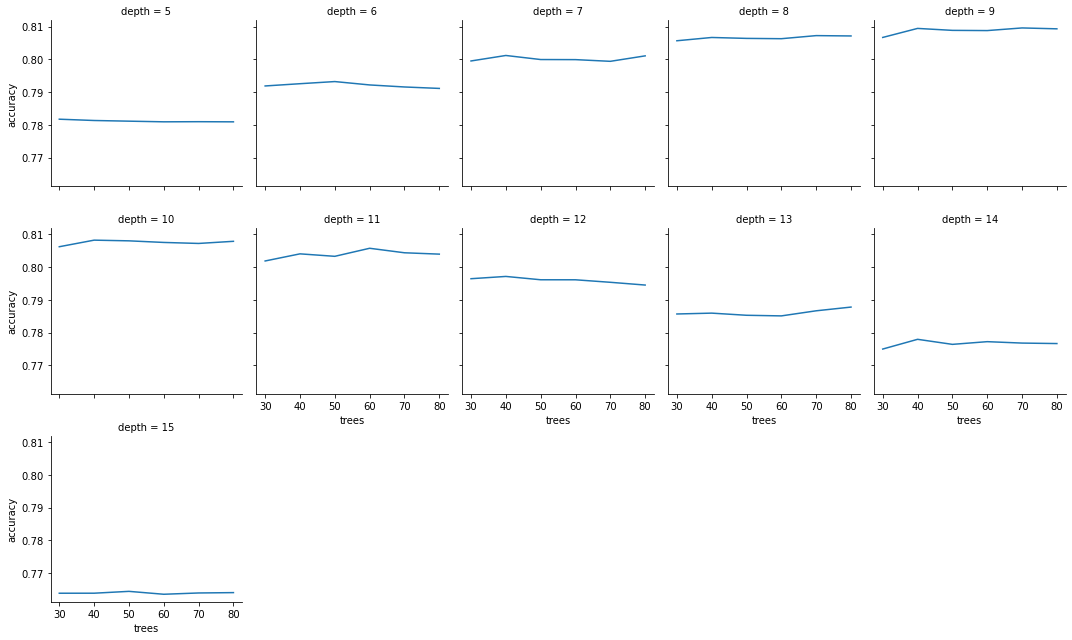

In [80]:
g = sns.FacetGrid(res_df2, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "accuracy")

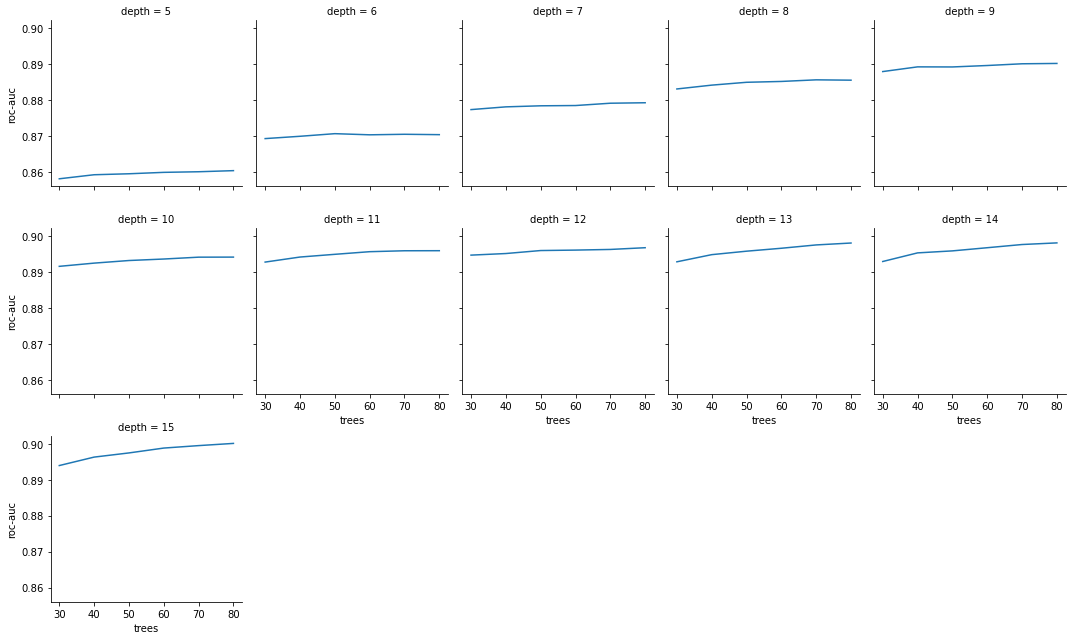

In [81]:
g = sns.FacetGrid(res_df2, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "roc-auc")

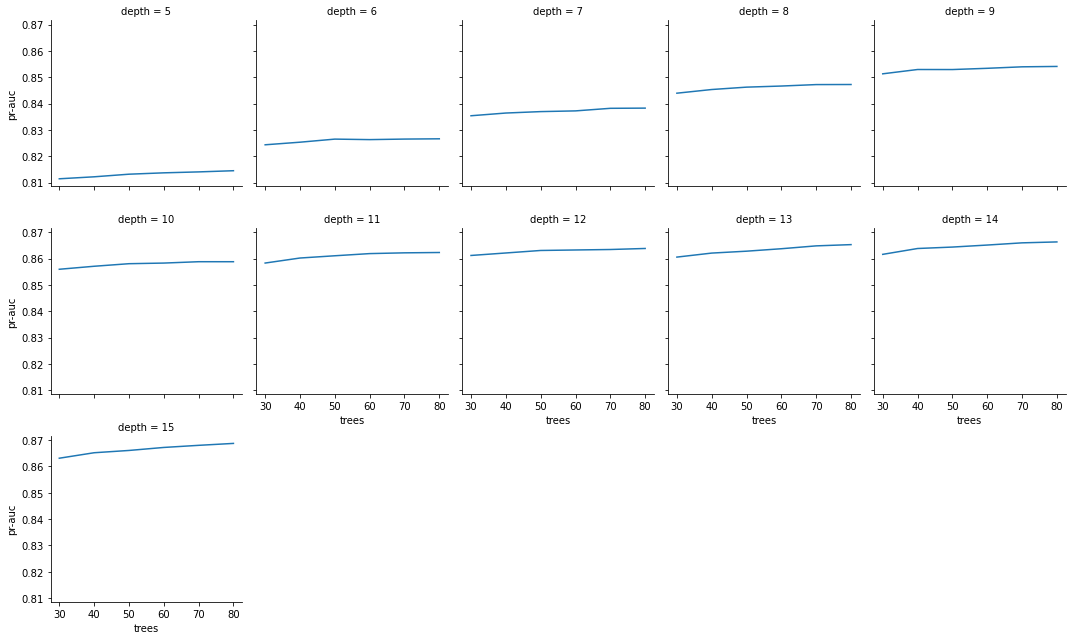

In [82]:
g = sns.FacetGrid(res_df2, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "pr-auc")

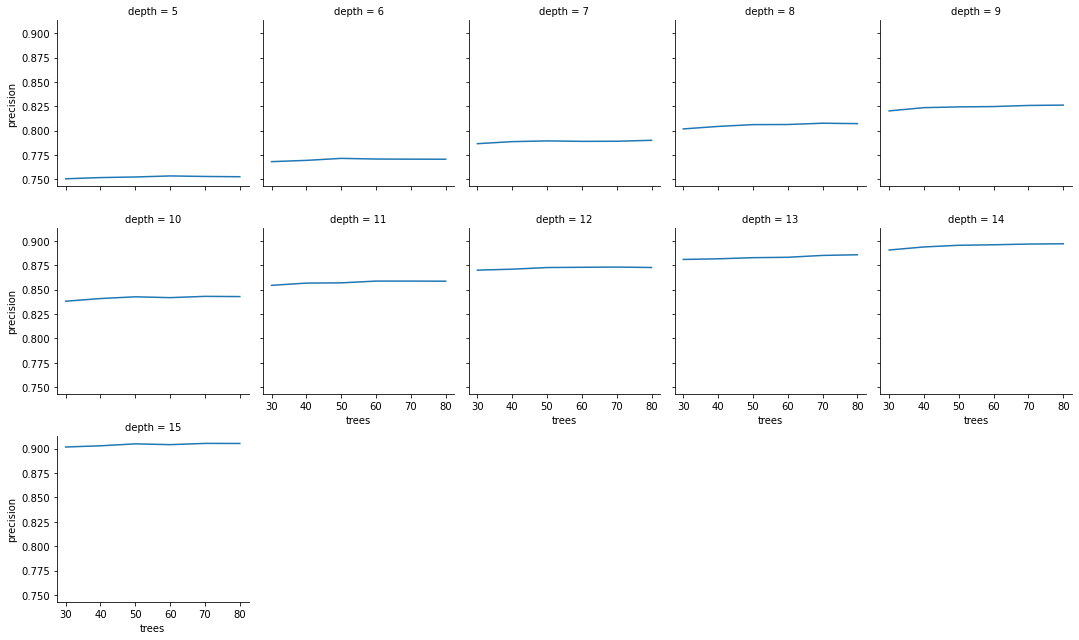

In [83]:
g = sns.FacetGrid(res_df2, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "precision")

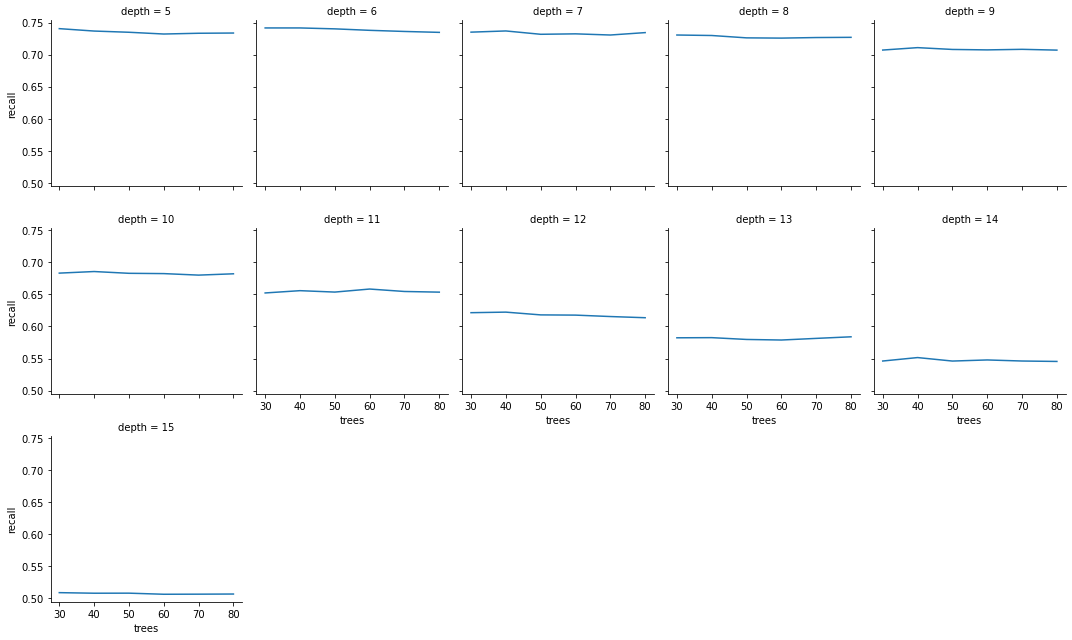

In [84]:
g = sns.FacetGrid(res_df2, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "recall")

In [85]:
res_df2.loc[res_df2['depth'] == 15]

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc
60,15,30,0.763869,0.901723,0.508802,0.893940,0.863095
61,15,40,0.763878,0.902966,0.507906,0.896290,0.865173
62,15,50,0.764441,0.904964,0.507991,0.897449,0.866040
63,15,60,0.763556,0.904149,0.506288,0.898801,0.867182
64,15,70,0.763948,0.905419,0.506421,0.899484,0.867984
65,15,80,0.764058,0.905366,0.506649,0.900096,0.868716


In [86]:
res_df2['score'] = (res_df2['roc-auc'] + res_df2['pr-auc'])/2
res_df2.head(10)

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc,score
0,5,30,0.781744,0.750631,0.740559,0.858162,0.811454,0.834808
1,5,40,0.781349,0.751874,0.736798,0.859286,0.812207,0.835747
2,5,50,0.781143,0.752490,0.734907,0.859558,0.813196,0.836377
3,5,60,0.780945,0.753558,0.732167,0.859951,0.813714,0.836832
4,5,70,0.780982,0.753027,0.733357,0.860119,0.814070,0.837095
5,5,80,0.780939,0.752739,0.733710,0.860425,0.814517,0.837471
6,6,30,0.791889,0.768228,0.741649,0.869334,0.824360,0.846847
7,6,40,0.792576,0.769519,0.741649,0.869977,0.825345,0.847661
8,6,50,0.793230,0.771577,0.740219,0.870705,0.826516,0.848610
9,6,60,0.792201,0.770905,0.737927,0.870388,0.826325,0.848357


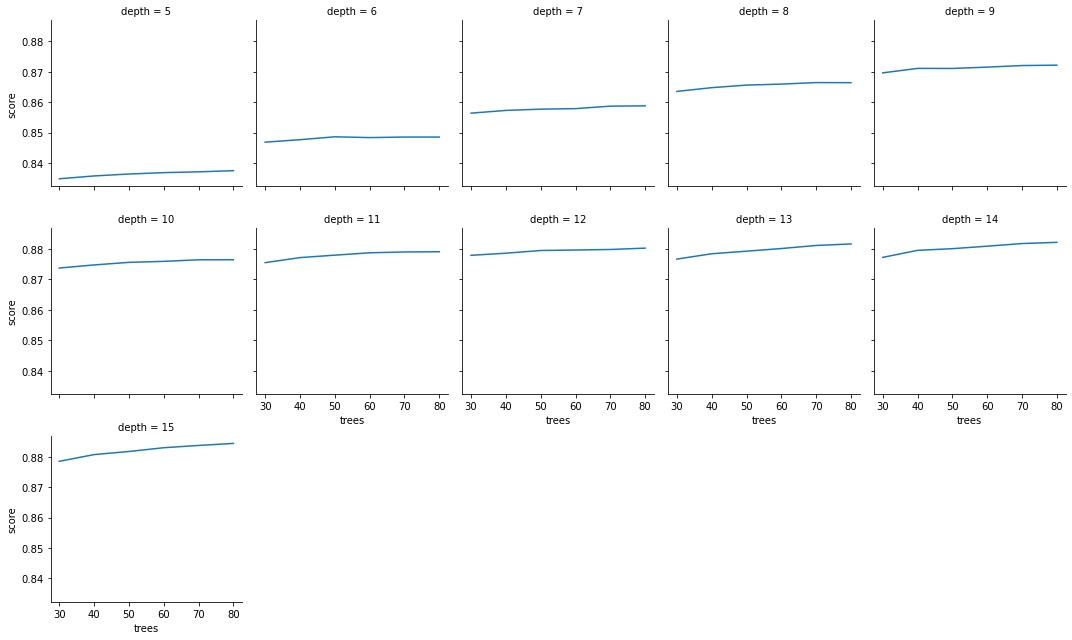

In [87]:
g = sns.FacetGrid(res_df2, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "score")

In [88]:
res_df2['score'].max()

0.8844059817038339

In [89]:
res_df2[res_df2['score'] == res_df2['score'].max()]

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc,score
65,15,80,0.764058,0.905366,0.506649,0.900096,0.868716,0.884406


In [90]:
res_df['score'] = (res_df['roc-auc'] + res_df['pr-auc'])/2
res_df.head()

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc,score
0,5,30,0.781744,0.750631,0.740559,0.858162,0.811454,0.834808
1,5,40,0.781349,0.751874,0.736798,0.859286,0.812207,0.835747
2,5,50,0.781143,0.752490,0.734907,0.859558,0.813196,0.836377
3,5,60,0.780945,0.753558,0.732167,0.859951,0.813714,0.836832
4,5,70,0.780982,0.753027,0.733357,0.860119,0.814070,0.837095


In [91]:
res_df[res_df['score'] == res_df['score'].max()]

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc,score
17,15,80,0.764058,0.905366,0.506649,0.900096,0.868716,0.884406


In [92]:
# try optimising number of trees now
# refine tuning
start = time.time()
res_df = manual_fold(5, selected_features, X_train, y_train, 10, 20, 1, 50, 120, 10)
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 10 n_trees: 50
accuracy: 0.8080201203807322
precision: 0.8426920898860694
recall: 0.6829317712037017
roc auc: 0.8931896564534785
pr auc: 0.85807771022481



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 10 n_trees: 60
accuracy: 0.8075315150319831
precision: 0.8418360327961143
recall: 0.6824727793960608
roc auc: 0.8936057098056033
pr auc: 0.8583163524197396



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 10 n_trees: 70
accuracy: 0.8072249495766188
precision: 0.8431495525022598
recall: 0.6801091171569478
roc auc: 0.8941212568044918
pr auc: 0.8588331370194086



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 10 n_trees: 80
accuracy: 0.8078762451683879
precision: 0.8429193448373328
recall: 0.6821700939836337
roc auc: 0.8941380928755

Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 14 n_trees: 50
accuracy: 0.7764246539305046
precision: 0.8955681690959214
recall: 0.5460272169589026
roc auc: 0.895868272438807
pr auc: 0.8643927439812069



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 14 n_trees: 60
accuracy: 0.77724807080394
precision: 0.8960933480546478
recall: 0.5477512882907156
roc auc: 0.8967470472851259
pr auc: 0.8651582028470182



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 14 n_trees: 70
accuracy: 0.7768158486259388
precision: 0.8968073386518116
recall: 0.5460848902704377
roc auc: 0.8976378739140664
pr auc: 0.8659938255833906



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 14 n_trees: 80
accuracy: 0.7766710982027488
precision: 0.8971099482075248
recall: 0.5454227733731638
roc auc: 0.8980895149037366
pr auc: 0.86

Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 18 n_trees: 50
accuracy: 0.7366220670112555
precision: 0.9221037063401821
recall: 0.42625396681275
roc auc: 0.8942406487500932
pr auc: 0.8646354230677993



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 18 n_trees: 60
accuracy: 0.7375972558444562
precision: 0.9222719147124998
recall: 0.42859844778477596
roc auc: 0.8963619881775046
pr auc: 0.8665215609896284



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 18 n_trees: 70
accuracy: 0.737973666301602
precision: 0.9227959428694792
recall: 0.42928434487060496
roc auc: 0.8977473585657281
pr auc: 0.8680394388185932



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 18 n_trees: 80
accuracy: 0.7374866414575058
precision: 0.9224526789702902
recall: 0.42825763928040034
roc auc: 0.8983719747524548
pr auc: 0

In [93]:
res_df['score'] = (res_df['roc-auc'] + res_df['pr-auc'])/2
res_df.head()

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc,score
0,10,50,0.808020,0.842692,0.682932,0.893190,0.858078,0.875634
1,10,60,0.807532,0.841836,0.682473,0.893606,0.858316,0.875961
2,10,70,0.807225,0.843150,0.680109,0.894121,0.858833,0.876477
3,10,80,0.807876,0.842919,0.682170,0.894138,0.858830,0.876484
4,10,90,0.808682,0.843881,0.683301,0.894292,0.859194,0.876743


In [94]:
res_df[res_df['score'] == res_df['score'].max()]

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc,score
79,19,120,0.729549,0.927722,0.405653,0.90139,0.871576,0.886483


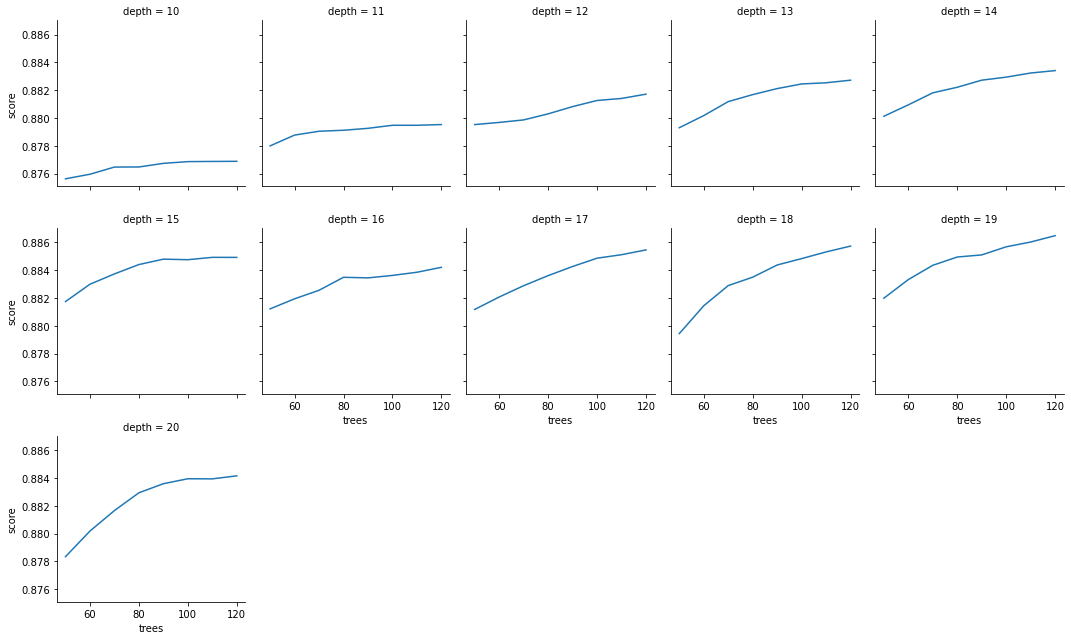

In [95]:
g = sns.FacetGrid(res_df, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "score")

In [96]:
res_df.loc[res_df['depth'] == 19]

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc,score
72,19,50,0.728442,0.924738,0.404374,0.896798,0.867173,0.881986
73,19,60,0.728887,0.926270,0.404727,0.897952,0.868698,0.883325
74,19,70,0.728712,0.926688,0.404138,0.898946,0.869761,0.884353
75,19,80,0.728688,0.925813,0.404538,0.899556,0.870340,0.884948
76,19,90,0.728822,0.926653,0.404426,0.899767,0.870432,0.885100
77,19,100,0.729524,0.927608,0.405714,0.900471,0.870893,0.885682
78,19,110,0.730123,0.927875,0.407022,0.900934,0.871121,0.886027
79,19,120,0.729549,0.927722,0.405653,0.901390,0.871576,0.886483


In [51]:
# refine tuning
start = time.time()
res_df2 = manual_fold(5, selected_features, X_train, y_train, 17, 19, 1, 120, 150, 10)
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 17 n_trees: 120
accuracy: 0.7425958866893154
precision: 0.9168673478444852
recall: 0.4444197155851956
roc auc: 0.901011897822878
pr auc: 0.869908016099982



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 17 n_trees: 130
accuracy: 0.743159013637815
precision: 0.9172835117745043
recall: 0.44564234674913744
roc auc: 0.9013155716612374
pr auc: 0.8700608088913654



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 17 n_trees: 140
accuracy: 0.7430442872035108
precision: 0.917066752425012
recall: 0.4454559912263103
roc auc: 0.9016405728097787
pr auc: 0.8704905588430683



Fold number: 1
Fold number: 2
Fold number: 3
Fold number: 4
Fold number: 5
average score for depth: 17 n_trees: 150
accuracy: 0.7436626130403166
precision: 0.9173411792349221
recall: 0.4468561151054254
roc auc: 0.9017393961

In [52]:
res_df2['score'] = (res_df2['roc-auc'] + res_df2['pr-auc'])/2
res_df2.head()

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc,score
0,17,120,0.742596,0.916867,0.444420,0.901012,0.869908,0.885460
1,17,130,0.743159,0.917284,0.445642,0.901316,0.870061,0.885688
2,17,140,0.743044,0.917067,0.445456,0.901641,0.870491,0.886066
3,17,150,0.743663,0.917341,0.446856,0.901739,0.870605,0.886172
4,18,120,0.737218,0.924047,0.426794,0.900828,0.870641,0.885734


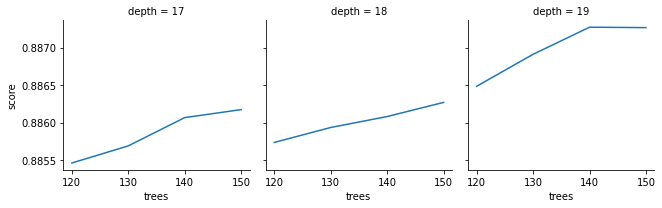

In [53]:
g = sns.FacetGrid(res_df2, col="depth", col_wrap=5)
g.map(sns.lineplot, "trees", "score")

In [54]:
res_df2[res_df2['score'] == res_df2['score'].max()]

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc,score
10,19,140,0.728767,0.927836,0.403647,0.902322,0.872221,0.887271


In [60]:
res_df2.sort_values('score', ascending = False).head()

,depth,trees,accuracy,precision,recall,roc-auc,pr-auc,score
10,19,140,0.728767,0.927836,0.403647,0.902322,0.872221,0.887271
11,19,150,0.728622,0.928430,0.402998,0.902252,0.872279,0.887265
9,19,130,0.729251,0.927676,0.404965,0.901891,0.871928,0.886909
8,19,120,0.729549,0.927722,0.405653,0.901390,0.871576,0.886483
7,18,150,0.736446,0.924168,0.424802,0.901375,0.871161,0.886268


In [57]:
# finally fit on the X train, y train and validate on X test, y test
x_train.info() # this is X train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109333 entries, 0 to 109332
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   mean_current_1_median     109333 non-null  float64
 1   mean_current_3_median     109333 non-null  float64
 2   sd_current_2_std          109333 non-null  float64
 3   order_6_T                 109333 non-null  uint8  
 4   mean_current_3_std        109333 non-null  float64
 5   diff_sd_current_2_std     109333 non-null  float64
 6   mean_current_3_min        109333 non-null  float64
 7   sd_current_2_min          109333 non-null  float64
 8   mean_current_2_std        109333 non-null  float64
 9   mean_current_1_std        109333 non-null  float64
 10  sd_current_3_median       109333 non-null  float64
 11  count_G                   109333 non-null  float64
 12  mean_current_1_min        109333 non-null  float64
 13  diff_sd_current_1_std     109333 non-null  f

In [58]:
x_test.info() # this is x test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23832 entries, 0 to 23831
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mean_current_1_median     23832 non-null  float64
 1   mean_current_3_median     23832 non-null  float64
 2   sd_current_2_std          23832 non-null  float64
 3   order_6_T                 23832 non-null  uint8  
 4   mean_current_3_std        23832 non-null  float64
 5   diff_sd_current_2_std     23832 non-null  float64
 6   mean_current_3_min        23832 non-null  float64
 7   sd_current_2_min          23832 non-null  float64
 8   mean_current_2_std        23832 non-null  float64
 9   mean_current_1_std        23832 non-null  float64
 10  sd_current_3_median       23832 non-null  float64
 11  count_G                   23832 non-null  float64
 12  mean_current_1_min        23832 non-null  float64
 13  diff_sd_current_1_std     23832 non-null  float64
 14  diff_m

In [59]:
# model with tuned hyperparameters
start = time.time()
tuned_forest = RandomForestClassifier(random_state = 42, n_jobs= -1, max_depth = 19, n_estimators = 140)
tuned_forest.fit(x_train,y_train.values.ravel())
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

Time taken: 0.15781922737757365 minutes


In [61]:
rf_y_pred = tuned_forest.predict(x_test)

print(metrics.confusion_matrix(y_test, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

y_predict_prob = tuned_forest.predict_proba(x_test)[:, 1]
print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

[[22597    51]
 [ 1052   132]]
accuracy: 0.9537176905001679
precision: 0.7213114754098361
recall:    0.11148648648648649
roc auc:   0.5546173160090503
pr auc:    0.1245588116966454
roc auc:   0.8807177204359076
pr auc:    0.4040704047878897


In [62]:
# model with tuned hyperparameters - 2nd best
start = time.time()
tuned_forest = RandomForestClassifier(random_state = 42, n_jobs= -1, max_depth = 19, n_estimators = 150)
tuned_forest.fit(x_train,y_train.values.ravel())
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

rf_y_pred = tuned_forest.predict(x_test)

print(metrics.confusion_matrix(y_test, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

y_predict_prob = tuned_forest.predict_proba(x_test)[:, 1]
print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

Time taken: 0.17297838926315307 minutes
[[22595    53]
 [ 1049   135]]
accuracy: 0.9537596508895603
precision: 0.7180851063829787
recall:    0.11402027027027027
roc auc:   0.5558400538917582
pr auc:    0.12589270637948485
roc auc:   0.8817878771289392
pr auc:    0.4036073178452801


In [63]:
# model with tuned hyperparameters - 3rd best
start = time.time()
tuned_forest = RandomForestClassifier(random_state = 42, n_jobs= -1, max_depth = 19, n_estimators = 130)
tuned_forest.fit(x_train,y_train.values.ravel())
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

rf_y_pred = tuned_forest.predict(x_test)

print(metrics.confusion_matrix(y_test, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

y_predict_prob = tuned_forest.predict_proba(x_test)[:, 1]
print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

Time taken: 0.15243700742721558 minutes
[[22595    53]
 [ 1051   133]]
accuracy: 0.9536757301107754
precision: 0.7150537634408602
recall:    0.11233108108108109
roc auc:   0.5549954592971637
pr auc:    0.12442313152983409
roc auc:   0.8801436623781589
pr auc:    0.40310892838202866


In [64]:
# model with tuned hyperparameters - 4th best
start = time.time()
tuned_forest = RandomForestClassifier(random_state = 42, n_jobs= -1, max_depth = 19, n_estimators = 120)
tuned_forest.fit(x_train,y_train.values.ravel())
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

rf_y_pred = tuned_forest.predict(x_test)

print(metrics.confusion_matrix(y_test, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

y_predict_prob = tuned_forest.predict_proba(x_test)[:, 1]
print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

Time taken: 0.14634230136871337 minutes
[[22595    53]
 [ 1056   128]]
accuracy: 0.9534659281638134
precision: 0.7071823204419889
recall:    0.10810810810810811
roc auc:   0.5528839728106771
pr auc:    0.12076231394887402
roc auc:   0.8797684092384508
pr auc:    0.4023678846534485


In [65]:
# model with tuned hyperparameters - 5th best
start = time.time()
tuned_forest = RandomForestClassifier(random_state = 42, n_jobs= -1, max_depth = 18, n_estimators = 150)
tuned_forest.fit(x_train,y_train.values.ravel())
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

rf_y_pred = tuned_forest.predict(x_test)

print(metrics.confusion_matrix(y_test, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

y_predict_prob = tuned_forest.predict_proba(x_test)[:, 1]
print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

Time taken: 0.18106695413589477 minutes
[[22582    66]
 [ 1032   152]]
accuracy: 0.9539274924471299
precision: 0.6972477064220184
recall:    0.12837837837837837
roc auc:   0.5627321068861161
pr auc:    0.13281465173147317
roc auc:   0.8849387169202938
pr auc:    0.404605126385976


In [71]:
# model with tuned hyperparameters - 2nd best
start = time.time()
tuned_forest = RandomForestClassifier(random_state = 42, n_jobs= -1, max_depth = 15, n_estimators = 150)
tuned_forest.fit(x_train,y_train.values.ravel())
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

rf_y_pred = tuned_forest.predict(x_test)

print(metrics.confusion_matrix(y_test, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

y_predict_prob = tuned_forest.predict_proba(x_test)[:, 1]
print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

Time taken: 0.13956321477890016 minutes
[[22436   212]
 [  908   276]]
accuracy: 0.9530043638804968
precision: 0.5655737704918032
recall:    0.23310810810810811
roc auc:   0.6118737290805464
pr auc:    0.1699398652032251
roc auc:   0.8847026943492415
pr auc:    0.4014836810728362


In [12]:
# base
start = time.time()
forest = RandomForestClassifier(random_state = 42, n_jobs= -1)
forest.fit(x_train,y_train.values.ravel())
end = time.time()
print("Time taken:", (end-start)/60, "minutes")

Time taken: 0.10705207983652751 minutes


In [13]:
rf_y_pred = forest.predict(x_test)

print(metrics.confusion_matrix(y_test, rf_y_pred))
# TN FP
# FN TP

print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

y_predict_prob = forest.predict_proba(x_test)[:, 1]
print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

[[22641     7]
 [ 1163    21]]
accuracy: 0.9509063444108762
precision: 0.75
recall:    0.017736486486486486
roc auc:   0.5087137042110991
pr auc:    0.062102297728241836
roc auc:   0.877690206073921
pr auc:    0.386084817732799


In [54]:
def forest_find_optimal_prauc(x_train,y_train,x_test,y_test,start,end,random_state):
  #We will attempt to prune the DecisionTree on the max_depth parameter, on both 'gini' and 'entropy' 
  max_depth = []
  acc_gini = []
  acc_entropy = []
  ccp_a = np.arange(start, end, 0.01).tolist()
  for i in ccp_a:
    dtree = RandomForestClassifier(random_state=random_state,criterion='gini', ccp_alpha=i)
    dtree.fit(x_train, y_train.values.ravel())
    pred = dtree.predict_proba(x_test)[:, 1]
    acc_gini.append(average_precision_score(y_test, pred))
    ###
    dtree = RandomForestClassifier(random_state=random_state,criterion='entropy', ccp_alpha=i)
    dtree.fit(x_train, y_train.values.ravel())
    pred = dtree.predict_proba(x_test)[:, 1]
    acc_entropy.append(average_precision_score(y_test, pred))
    ####
    max_depth.append(i)
  d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
  # visualizing changes in parameters
  plt.plot('max_depth','acc_gini', data=d, label='gini')
  plt.plot('max_depth','acc_entropy', data=d, label='entropy')
  plt.xlabel('max_depth')
  plt.ylabel('pr-auc')
  plt.legend()
  print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
  print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

Best max_depth for gini: 0.0
Best max_depth for entropy: 0.0


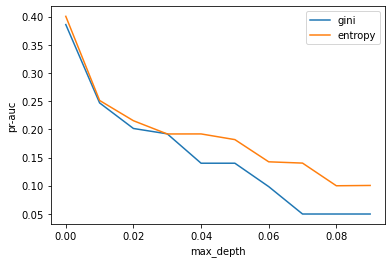

In [55]:
forest_find_optimal_prauc(x_df,y_data,x_test_df,y_test,start=0,end=0.1,random_state=42)
# Best max_depth for gini: 
# Best max_depth for entropy: 

In [21]:
def forest_find_optimal_prauc(x_train,y_train,x_test,y_test,start,end,random_state):
  #We will attempt to prune the DecisionTree on the max_depth parameter, on both 'gini' and 'entropy' 
  max_depth = []
  acc_gini = []
  acc_entropy = []
  for i in range(start,end):
    dtree = RandomForestClassifier(random_state=random_state,criterion='gini', max_depth=i)
    dtree.fit(x_train, y_train.values.ravel())
    pred = dtree.predict_proba(x_test)[:, 1]
    acc_gini.append(average_precision_score(y_test, pred))
    ###
    dtree = RandomForestClassifier(random_state=random_state,criterion='entropy', max_depth=i)
    dtree.fit(x_train, y_train.values.ravel())
    pred = dtree.predict_proba(x_test)[:, 1]
    acc_entropy.append(average_precision_score(y_test, pred))
    ####
    max_depth.append(i)
  d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
  # visualizing changes in parameters
  plt.plot('max_depth','acc_gini', data=d, label='gini')
  plt.plot('max_depth','acc_entropy', data=d, label='entropy')
  plt.xlabel('max_depth')
  plt.ylabel('pr-auc')
  plt.legend()
  print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
  print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

In [22]:
def forest_find_optimal_rocauc(x_train,y_train,x_test,y_test,start,end,random_state):
  #We will attempt to prune the DecisionTree on the max_depth parameter, on both 'gini' and 'entropy' 
  max_depth = []
  acc_gini = []
  acc_entropy = []
  for i in range(start,end):
    dtree = RandomForestClassifier(random_state=random_state,criterion='gini', max_depth=i)
    dtree.fit(x_train, y_train.values.ravel())
    pred = dtree.predict_proba(x_test)[:, 1]
    acc_gini.append(roc_auc_score(y_test, pred))
    ###
    dtree = RandomForestClassifier(random_state=random_state,criterion='entropy', max_depth=i)
    dtree.fit(x_train, y_train.values.ravel())
    pred = dtree.predict_proba(x_test)[:, 1]
    acc_entropy.append(roc_auc_score(y_test, pred))
    ####
    max_depth.append(i)
  d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
  # visualizing changes in parameters
  plt.plot('max_depth','acc_gini', data=d, label='gini')
  plt.plot('max_depth','acc_entropy', data=d, label='entropy')
  plt.xlabel('max_depth')
  plt.ylabel('roc-auc')
  plt.legend()
  print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
  print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

In [23]:
forest_find_optimal_rocauc(x_df,y_data,x_test_df,y_test,start=10,end=30,random_state=42)
# Best max_depth for gini: 6
# Best max_depth for entropy: 7

KeyboardInterrupt: 

In [ ]:
forest_find_optimal_prauc(x_df,y_data,x_test_df,y_test,start=0,end=0.1,random_state=42)
# Best max_depth for gini: 6
# Best max_depth for entropy: 7

In [20]:
max_d = np.arange(5, 25, 5).tolist()
ccp_a = np.arange(0, 0.1, 0.01).tolist()
a = [max_d, ccp_a]
space = list(itertools.product(*a))
print(space)

[(5, 0.0), (5, 0.01), (5, 0.02), (5, 0.03), (5, 0.04), (5, 0.05), (5, 0.06), (5, 0.07), (5, 0.08), (5, 0.09), (10, 0.0), (10, 0.01), (10, 0.02), (10, 0.03), (10, 0.04), (10, 0.05), (10, 0.06), (10, 0.07), (10, 0.08), (10, 0.09), (15, 0.0), (15, 0.01), (15, 0.02), (15, 0.03), (15, 0.04), (15, 0.05), (15, 0.06), (15, 0.07), (15, 0.08), (15, 0.09), (20, 0.0), (20, 0.01), (20, 0.02), (20, 0.03), (20, 0.04), (20, 0.05), (20, 0.06), (20, 0.07), (20, 0.08), (20, 0.09)]


In [21]:
space[0][1]

0.0

In [22]:
# forest_find_optimal_prauc(X_train,y_train,X_test,y_test,start=1,end=30,random_state=1)
# # Best max_depth for gini: 19
# # Best max_depth for entropy: 18

In [23]:
# forest2 = RandomForestClassifier(n_estimators=11, 
#                                   bootstrap = True,
#                                   max_features = 'sqrt',
#                                   max_depth=19,
#                                   criterion='gini',random_state=1, n_jobs= -1)
# forest2.fit(X_train,y_train_full.values.ravel())

In [24]:
# rf_y_pred = forest2.predict(X_test)

In [25]:
# print(metrics.confusion_matrix(y_test, rf_y_pred))
# # TN FP
# # FN TP

# print(f'accuracy: {metrics.accuracy_score(y_test, rf_y_pred)}')
# print(f'precision: {metrics.precision_score(y_test,rf_y_pred)}')
# print(f'recall:    {metrics.recall_score(y_test, rf_y_pred)}')
# print(f'roc auc:   {metrics.roc_auc_score(y_test, rf_y_pred)}')
# print(f'pr auc:    {metrics.average_precision_score(y_test, rf_y_pred)}')

# y_predict_prob = forest1.predict_proba(X_test)[:, 1]
# print(metrics.confusion_matrix(y_test, rf_y_pred))
# print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict_prob)}')
# print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict_prob)}')

In [26]:
# forest2 = RandomForestClassifier(n_estimators=31, 
#                                   bootstrap = True,
#                                   max_features = 'sqrt',
#                                   max_depth=19,
#                                   criterion='gini',random_state=1, n_jobs= -1)
# forest2.fit(X_train,y_train_full.values.ravel())

In [27]:
# rf_y_pred = forest2.predict(X_test)

In [28]:
# print(metrics.confusion_matrix(y_test_full, rf_y_pred))
# # TN FP
# # FN TP

# print(f'accuracy: {metrics.accuracy_score(y_test_full, rf_y_pred)}')
# print(f'precision: {metrics.precision_score(y_test_full,rf_y_pred)}')
# print(f'recall:    {metrics.recall_score(y_test_full, rf_y_pred)}')
# print(f'roc auc:   {metrics.roc_auc_score(y_test_full, rf_y_pred)}')
# print(f'pr auc:    {metrics.average_precision_score(y_test_full, rf_y_pred)}')

In [29]:
# forest2.feature_importances_

In [30]:
# forest3 = RandomForestClassifier(n_estimators=31, 
#                                   bootstrap = True,
#                                   max_features = "log2",
#                                   max_depth=19,
#                                   criterion='gini',random_state=1, n_jobs= -1)
# forest3.fit(X_train,y_train_full.values.ravel())

In [31]:
# rf_y_pred = forest3.predict(X_test)

In [32]:
# print(metrics.confusion_matrix(y_test_full, rf_y_pred))
# # TN FP
# # FN TP

# print(f'accuracy: {metrics.accuracy_score(y_test_full, rf_y_pred)}')
# print(f'precision: {metrics.precision_score(y_test_full,rf_y_pred)}')
# print(f'recall:    {metrics.recall_score(y_test_full, rf_y_pred)}')
# print(f'roc auc:   {metrics.roc_auc_score(y_test_full, rf_y_pred)}')
# print(f'pr auc:    {metrics.average_precision_score(y_test_full, rf_y_pred)}')

In [33]:
# forest3.feature_importances_

In [34]:
# forest4 = RandomForestClassifier(n_estimators=111, 
#                                   bootstrap = True,
#                                   max_features = 'sqrt',
#                                   max_depth=19,
#                                   criterion='gini',random_state=1, n_jobs= -1)
# forest4.fit(X_train,y_train_full.values.ravel())

In [35]:
# rf_y_pred = forest4.predict(X_test)

In [36]:
# print(metrics.confusion_matrix(y_test_full, rf_y_pred))
# # TN FP
# # FN TP

# print(f'accuracy: {metrics.accuracy_score(y_test_full, rf_y_pred)}')
# print(f'precision: {metrics.precision_score(y_test_full,rf_y_pred)}')
# print(f'recall:    {metrics.recall_score(y_test_full, rf_y_pred)}')
# print(f'roc auc:   {metrics.roc_auc_score(y_test_full, rf_y_pred)}')
# print(f'pr auc:    {metrics.average_precision_score(y_test_full, rf_y_pred)}')

In [37]:
# forest4.feature_importances_

In [38]:
# forest5 = RandomForestClassifier(random_state=1, n_jobs= -1)
# forest5.fit(X_train,y_train_full.values.ravel())

In [39]:
# rf_y_pred = forest5.predict(X_test)

In [40]:
# print(metrics.confusion_matrix(y_test_full, rf_y_pred))
# # TN FP
# # FN TP

# print(f'accuracy: {metrics.accuracy_score(y_test_full, rf_y_pred)}')
# print(f'precision: {metrics.precision_score(y_test_full,rf_y_pred)}')
# print(f'recall:    {metrics.recall_score(y_test_full, rf_y_pred)}')
# print(f'roc auc:   {metrics.roc_auc_score(y_test_full, rf_y_pred)}')
# print(f'pr auc:    {metrics.average_precision_score(y_test_full, rf_y_pred)}')

In [41]:
# forest5.feature_importances_

In [42]:
#y_test_full.head()

In [43]:
#y_test_full[0:1]

In [44]:
#import pickle
#import sys

#p = pickle.dumps(forest1)
#print(sys.getsizeof(p))

In [45]:
#pickle.dump(forest1, open('dsa_rf_model.pkl', 'wb'))

In [46]:
# pickled_model = pickle.load(open('model.pkl', 'rb'))
# pickled_model.predict(X_test)

In [47]:
#temp = X_train_full[X_train_full.isna().any(axis=1)].iloc[0]

In [48]:
#temp.tolist()

In [ ]:
# search space
# max depth: 5 to 50, step 5
# number of trees: 30 to 80, step 10